## How to minimize cost

#### cost minimize 1
##### cost = tf.reducemean(tf.square(hypothesis - Y)) 

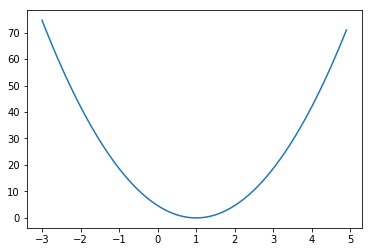

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

X = [1, 2, 3]
Y = [1, 2, 3]
W = tf.placeholder(tf.float32)

hypothesis = X * W 
cost = tf.reduce_mean(tf.square(hypothesis - Y))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

W_val = []
cost_val = []
for i in range(-30, 50):
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict = {W : feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)
    
plt.plot(W_val, cost_val)
plt.show()

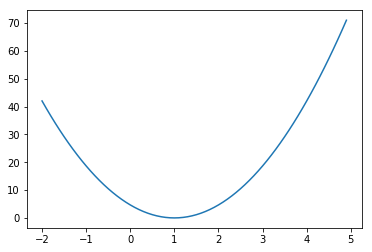

In [3]:
W_val = []
cost_val = []
for i in range(-20, 50):
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)
    
plt.plot(W_val, cost_val)
plt.show()

#### cost minimize 2
##### tf.reduce_sum

In [4]:
import tensorflow as tf

x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name='weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

hypothesis = X * W
cost = tf.reduce_sum(tf.square(hypothesis - Y))

learning_rate = 0.1
gradient      = tf.reduce_mean((W * X - Y) * X)
descent       = W - learning_rate * gradient 
update        = W.assign(descent)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(21):
    sess.run(update, feed_dict = { X : x_data, Y : y_data})
    
    print("step={step},   \t sess_cost={sess_cost},    \t W={sess_W}".format(
            step      = step, 
            sess_cost = sess.run(cost, feed_dict={X: x_data, Y: y_data}), 
            sess_W    = sess.run(W)
    ));    

step=0,   	 sess_cost=2.497605800628662,    	 W=[0.5776253]
step=1,   	 sess_cost=0.7104301452636719,    	 W=[0.7747335]
step=2,   	 sess_cost=0.20207789540290833,    	 W=[0.87985784]
step=3,   	 sess_cost=0.057479918003082275,    	 W=[0.9359242]
step=4,   	 sess_cost=0.016349880024790764,    	 W=[0.9658262]
step=5,   	 sess_cost=0.004650619812309742,    	 W=[0.981774]
step=6,   	 sess_cost=0.001322851050645113,    	 W=[0.99027944]
step=7,   	 sess_cost=0.00037628019344992936,    	 W=[0.9948157]
step=8,   	 sess_cost=0.00010702852887334302,    	 W=[0.99723506]
step=9,   	 sess_cost=3.0443014111369848e-05,    	 W=[0.9985254]
step=10,   	 sess_cost=8.659502782393247e-06,    	 W=[0.9992135]
step=11,   	 sess_cost=2.4631440282973927e-06,    	 W=[0.99958056]
step=12,   	 sess_cost=7.006400437603588e-07,    	 W=[0.9997763]
step=13,   	 sess_cost=1.9943543350109394e-07,    	 W=[0.9998807]
step=14,   	 sess_cost=5.6732346820353996e-08,    	 W=[0.99993634]
step=15,   	 sess_cost=1.6184188211809

#### cost minimize 3
##### tf.train.GradientDescentOptimizer(learning_rate=0.1)

In [5]:
import tensorflow as tf

X = [1, 2, 3]
Y = [1, 2, 3]
W = tf.Variable(5.0)

hypothesis = X * W
cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1)
train = optimizer.minimize(cost)

sess = tf.Session()

In [6]:
from tqdm import tqdm_notebook

sess.run(tf.global_variables_initializer())

W_val = []
step_val = []

for step in tqdm_notebook(range(101)):
    W_val.append(sess.run(W))
    step_val.append(step)
    
    if step % 10 == 0 or step < 10:
        print("step={step}, \t W={W_val}".format(
              step  = step, 
              W_val = sess.run(W)
              )); 
                
    sess.run(train)        

step=0, 	 W=5.0
step=1, 	 W=1.2666664123535156
step=2, 	 W=1.0177778005599976
step=3, 	 W=1.0011851787567139
step=4, 	 W=1.0000790357589722
step=5, 	 W=1.0000052452087402
step=6, 	 W=1.0000003576278687
step=7, 	 W=1.0
step=8, 	 W=1.0
step=9, 	 W=1.0
step=10, 	 W=1.0
step=20, 	 W=1.0
step=30, 	 W=1.0
step=40, 	 W=1.0
step=50, 	 W=1.0
step=60, 	 W=1.0
step=70, 	 W=1.0
step=80, 	 W=1.0
step=90, 	 W=1.0
step=100, 	 W=1.0



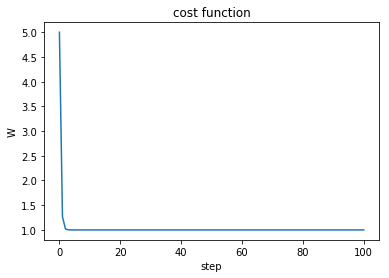

In [7]:
plt.plot(step_val, W_val)
plt.title('cost function')
plt.xlabel('step')
plt.ylabel('W')
plt.show()

In [9]:
type(train)

tensorflow.python.framework.ops.Operation

In [14]:
X = [1, 2, 3]
Y = [2, 4, 6]
W = tf.Variable(-7.0)

hypothesis = X * W
cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

sess = tf.Session()

writer = tf.summary.FileWriter("./graph/sect03", sess.graph)

In [16]:
sess.graph

In [17]:
sess.run(tf.global_variables_initializer())

for step in tqdm_notebook(range(101)):
    
    if step % 10 == 0 or step < 10:
        print("step={step}, \t W={W_val}".format( 
               step  = step, 
               W_val = sess.run(W)
               ));    
    sess.run(train)

step=0, 	 W=-7.0
step=1, 	 W=1.4000000953674316
step=2, 	 W=1.9600000381469727
step=3, 	 W=1.997333288192749
step=4, 	 W=1.9998222589492798
step=5, 	 W=1.999988079071045
step=6, 	 W=1.9999991655349731
step=7, 	 W=1.9999998807907104
step=8, 	 W=2.0
step=9, 	 W=2.0
step=10, 	 W=2.0
step=20, 	 W=2.0
step=30, 	 W=2.0
step=40, 	 W=2.0
step=50, 	 W=2.0
step=60, 	 W=2.0
step=70, 	 W=2.0
step=80, 	 W=2.0
step=90, 	 W=2.0
step=100, 	 W=2.0



In [19]:
W_val = sess.run(W)
W_val

2.0